<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/25_Named_Entity_Recognition_%26_Emotion_Mining_26_03_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Named Entity Recognition

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import pandas
# book=pd.read_csv("apple.txt",error_bad_lines=False)
book = pd.read_csv("apple.txt", on_bad_lines='skip')  # 'skip' will skip bad lines

In [3]:
# Data Preprocessing
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [4]:
# Part Of Speech Tagging - language
nlp = spacy.load('en_core_web_sm') # load english language model from spacy library

In [5]:
# Before you recognize an entity, we need to understand what is the language in which the text is written

In [6]:
one_block = book[10] # Selecting 1 sentence / 1 review
doc_block = nlp(one_block) # On that review we are applying the language model
spacy.displacy.render(doc_block, style='ent', jupyter=True) # and then we are applying entity casting / entity recognition

In [7]:
# As we can see that there is a miss-classification. It is showing Warranty as person

In [8]:
one_block

"Hi, Think thousand time before buying. One calm night i was cuddling in jaipuri blanket while enjoying youtube on this expensive machine. Cold night and little excitement created electrostatic charge which spike though spaceBar button. that's how it went to deep sleep forever. Nothing can bring it back and i am in no mood in spending another fortune on this machine. Apple, of you (i)care, this is the least of security feature included in all electronic devices. And the best part, it was a week after Warranty expiration date."

In [9]:
# Along with entity recognition we can apply parts of speech tagging (POS)
for token in doc_block[0:20]:
    print(token, token.pos_)

Hi INTJ
, PUNCT
Think VERB
thousand NUM
time NOUN
before ADP
buying VERB
. PUNCT
One NUM
calm ADJ
night NOUN
i PRON
was AUX
cuddling VERB
in ADP
jaipuri PROPN
blanket PROPN
while SCONJ
enjoying VERB
youtube NOUN


In [10]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['enjoying', 'youtube', 'machine', 'night', 'excitement', 'created', 'charge', 'spike', 'button', 'went', 'sleep', 'bring', 'mood', 'spending', 'fortune', 'machine', 'security', 'feature', 'included', 'devices']


In [11]:
#Counting tokens again

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,night,2
1,machine,2
2,think,1
3,time,1
4,buying,1
5,cuddling,1
6,enjoying,1
7,youtube,1
8,excitement,1
9,created,1


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

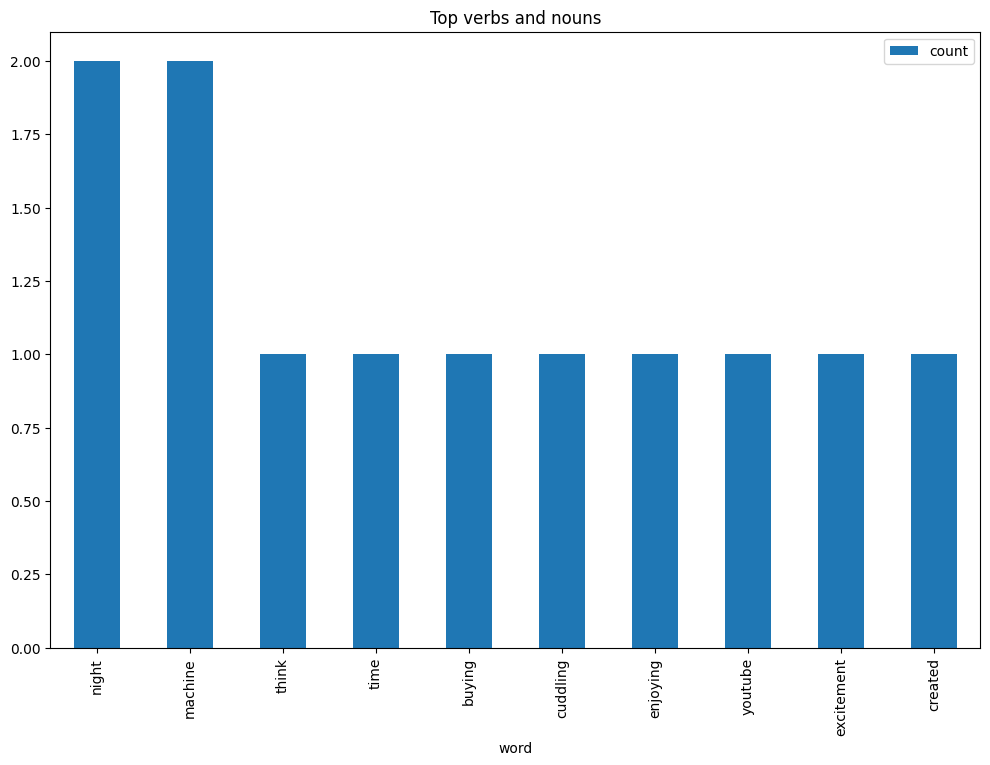

In [12]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [13]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [14]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
# book=pd.read_csv("apple.txt",error_bad_lines=False)
book = pd.read_csv("apple.txt", on_bad_lines='skip')  # 'skip' will skip bad lines
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

In [16]:
sentences = tokenize.sent_tokenize(" ".join(book)) # Breaking down the reviews into sentences
sentences[5:15]

['!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Ove

In [17]:
# Creating a dataframe with a column called sentence and storing all the reviews
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
183,You can get one of the best movie experiences ...
184,Overall I would it a 4.5/5.
185,"I got a great deal on this laptop, which I hav..."
186,I got it not only on discount but also was abl...


In [18]:
# Converting the afinn csv file into a dictionary format
# here we are setting index as word - afinn.set_inder('word') and then we are converting the value as dictionary['value'].to_dict()
# So the data will be in the form of key:value
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [19]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm') # loading the english language library
sentiment_lexicon = affinity_scores # storing the affinity scores in a variable called sentiment_lexicon
# creating an user defined function - where whatever text is being inputed, the sentiment is being calculated (with the scores from the dictionary)
def calculate_sentiment(text: str = None):
    sent_score = 0 # defining sentiment score and initializing it to 0
    if text: # if there is some text
        sentence = nlp(text) # we apply nlp on the text
        for word in sentence: # for every word in the sentence, we need to find the sentiment
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
            # we are finding the sentiment score by applying the lexicon on the lemmatized version of the word and then pullout the score
            # in (word.lemma_,0) - word.lemma_ lemmatises the word & 0 is used to pull out the score
    return sent_score

In [20]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [21]:
# Applying the above defined function the the column sentence and saving it in a new column call sentiment_value
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [22]:
sent_df

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
183,You can get one of the best movie experiences ...,3
184,Overall I would it a 4.5/5.,0
185,"I got a great deal on this laptop, which I hav...",3
186,I got it not only on discount but also was abl...,0


In [23]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

,word_count
0,17
1,7
2,31
3,7
4,65
5,1
6,7
7,47
8,16
9,29


In [24]:
sent_df

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
183,You can get one of the best movie experiences ...,3,12
184,Overall I would it a 4.5/5.,0,6
185,"I got a great deal on this laptop, which I hav...",3,18
186,I got it not only on discount but also was abl...,0,18


In [25]:
# We can find out the positive sentences and the negative sentences
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
111,"The build is super strong, the operating syste...",5,10
46,Now my mac is perfectly fine : Got the Apple M...,5,27
47,Ships with macOS sierra but update is availabl...,6,86
65,I hope this comment can help to save somebody’...,6,10
104,The switch was inspired by the awesome reviews...,6,13
60,I use this for music production and it works a...,7,30
179,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,7,43
0,It's amazing..... battery last around 10 -12 h...,7,17
152,..So now I m working with the external keyboar...,17,113
87,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [26]:
# Sentiment score of the whole review or the average sentiment score of all the reviews
sent_df['sentiment_value'].describe()

,sentiment_value
count,188.000000
mean,0.930851
std,3.379793
min,-11.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,24.000000


In [27]:
# Sentiment score of the negative sentiment reviews
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,!,0,1
6,"), all printers are not compatible (e.g.",0,7
8,you need to spend extra for an external CD wri...,0,16


In [28]:
# Sentiment score of the positive sentiment reviews
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
87,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [29]:
sent_df['index']=range(0,len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

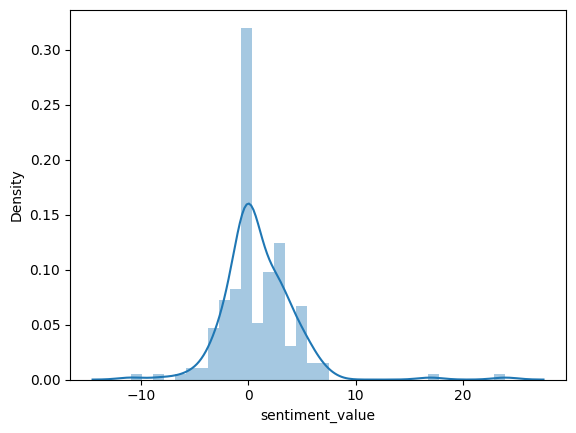

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

In [31]:
# The average sentiment is around 0
# therefore, the text is having a mix of both positive and negative reviews

<Axes: xlabel='index', ylabel='sentiment_value'>

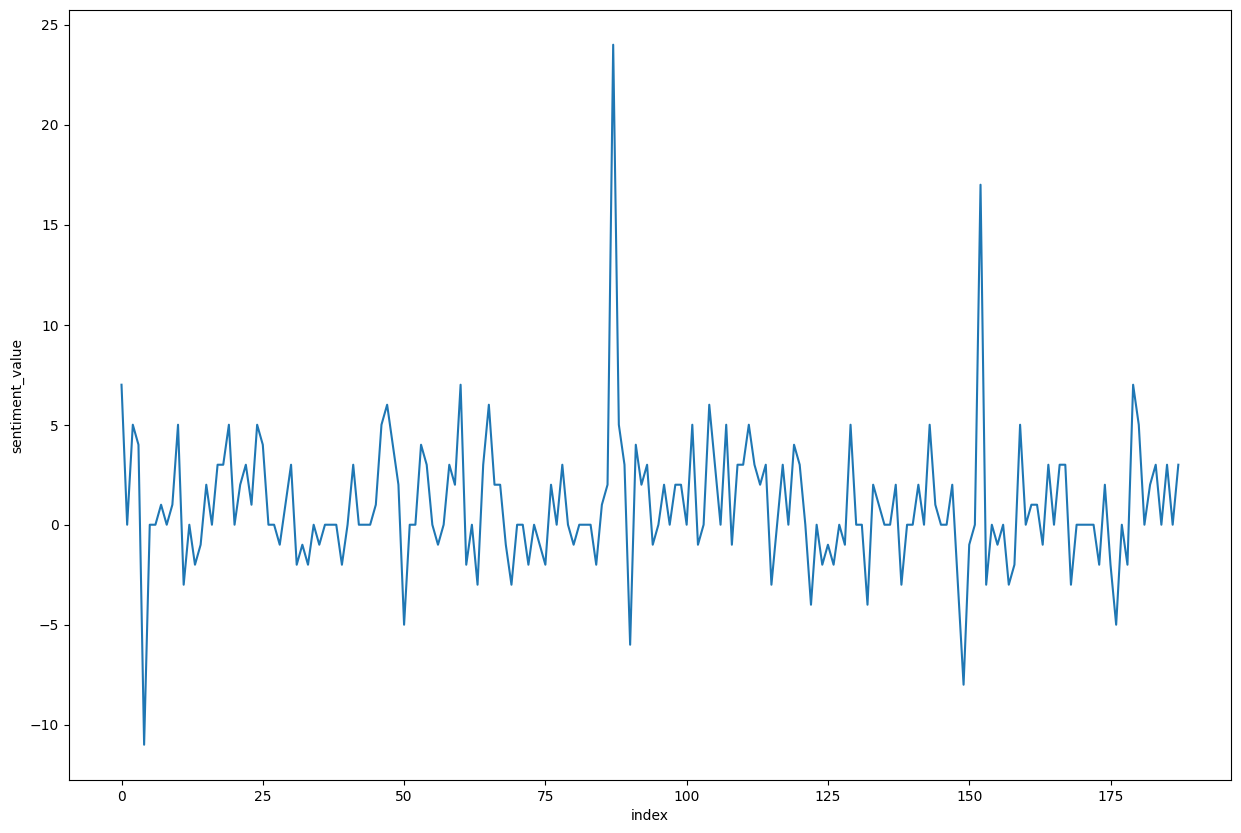

In [32]:
# Creating a line plot - to see how sentiment has changed.
# We can also see the value of the most negative and positive sentences
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

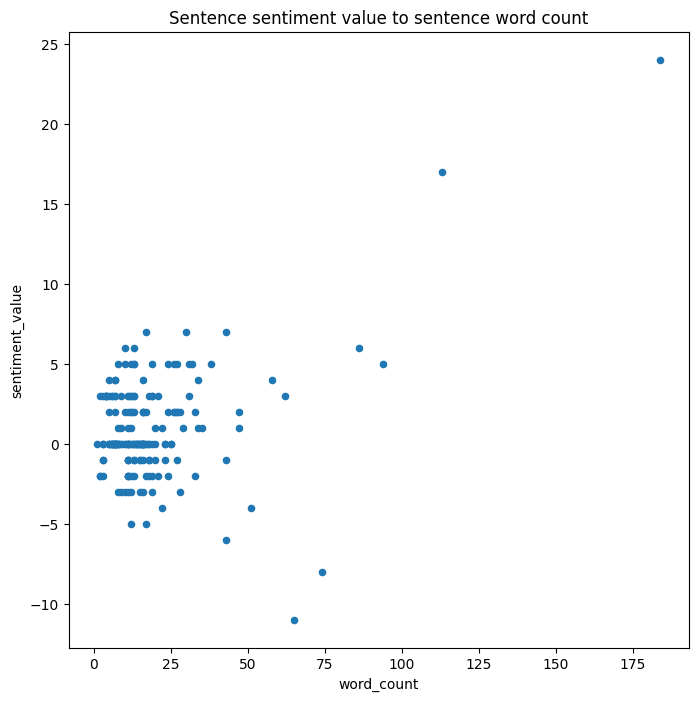

In [33]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')